# Connecting to Drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'      'Internship-Aug2020-Gowtham R.pdf'   Photos
'Getting started.pdf'  'My Drive'			   'Pongal 2021'


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project

/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project


# Imports

In [3]:
from keras.models import load_model
import pandas as pd
import numpy as np 
from os.path import join
from myFunctions.candle_stick_plot import plotCandleStick
from myFunctions.list_data_dir import load_data_files
from myFunctions import dataConversion 
from myFunctions.predictionPlot import prediction_plot
from myFunctions.twitter import get_tweets
from myFunctions.prediction_input import input_next_day
from myFunctions.trend_prediction import predicted_plot
from textblob import TextBlob
import re
from myFunctions.textprocess import process_tweet



# Global Variables

In [4]:
fields = ['Date','High','Low','Open','Close']
lookback = 30
datafolder = r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50_CurrentData"
prediction_date = pd.Timestamp(2021,5,16,00,00,00)

In [5]:
data_files = load_data_files(datafolder)

In [6]:
companyname = "HCLTECH"
filename = companyname + ".NS.csv"
datafile= join(datafolder,filename) 
candlestick_title = "Prediction of " + companyname

# Company Twitter Data

In [7]:
company_twitter_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/Company_Twitter_Handles.csv")

In [8]:
hashtag_list = company_twitter_df[company_twitter_df['Company_Name']==companyname]['Hashtags'].tolist()
company_hashtag = hashtag_list[0]

In [9]:
media_list = ['EconomicTimes','forbes_india','livemint','NDTVProfit','ReutersIndia']

# Load Models

In [10]:
high_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_model')
open_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/open_model')
close_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/close_model')
low_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/new_low_model')

# Stock Data Imports


In [11]:
stock_df = pd.read_csv(datafile,usecols = fields)
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Stock Data Conversion

In [12]:
High_X , High_y = dataConversion.convert2matrix(stock_df['High'],lookback)
Low_X,Low_y = dataConversion.convert2matrix(stock_df['Low'],lookback)
Open_X,Open_y = dataConversion.convert2matrix(stock_df['Open'],lookback)
Close_X,Close_y = dataConversion.convert2matrix(stock_df['Close'],lookback)

In [13]:
high_predict_input = input_next_day(stock_df,lookback,'High')
low_predict_input = input_next_day(stock_df,lookback,'Low')
open_predict_input = input_next_day(stock_df,lookback,'Open')
close_predict_input = input_next_day(stock_df,lookback,'Close')

In [14]:
high_predict_input

array([1000.799988, 1000.      , 1013.5     , 1040.      , 1040.599976,
       1045.      , 1054.400024, 1054.800049, 1042.949951, 1020.799988,
        994.700012, 1016.799988, 1028.449951, 1006.      ,  971.900024,
        974.849976,  954.5     ,  938.549988,  935.849976,  929.700012,
        915.      ,  910.450012,  915.      ,  910.799988,  923.900024,
        921.400024,  921.599976,  912.450012,  908.950012,  912.      ])

# Stock Predictions

In [15]:
predicted_high_stock_value = high_model.predict(high_predict_input.reshape(-1,lookback))[0][0]
predicted_low_stock_value = low_model.predict(low_predict_input.reshape(-1,lookback))[0][0]
predicted_open_stock_value = open_model.predict(open_predict_input.reshape(-1,lookback))[0][0]
predicted_close_stock_value = close_model.predict(close_predict_input.reshape(-1,lookback))[0][0]

In [16]:
pred_df = stock_df[-30:]
pred_df.loc[pred_df.index[-1]+1] = [prediction_date,predicted_open_stock_value,predicted_high_stock_value,predicted_low_stock_value,predicted_close_stock_value]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Prediction Graphs


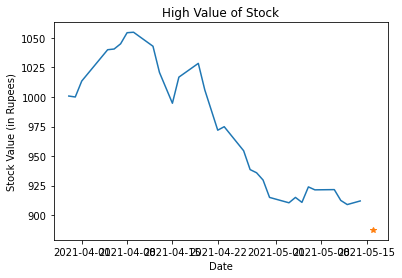

In [17]:
predicted_plot(stock_df,lookback,high_predict_input,predicted_high_stock_value,prediction_date,"High Value of Stock")

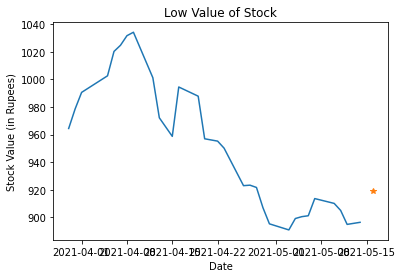

In [18]:
predicted_plot(stock_df,lookback,low_predict_input,predicted_low_stock_value,prediction_date,"Low Value of Stock")

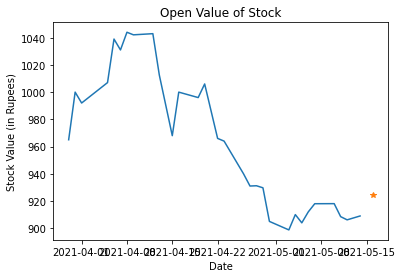

In [19]:
predicted_plot(stock_df,lookback,open_predict_input,predicted_open_stock_value,prediction_date,"Open Value of Stock")

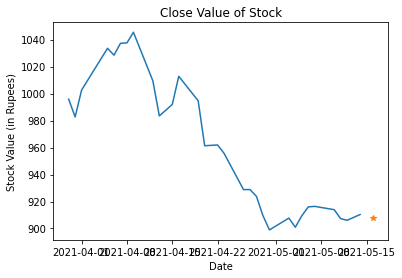

In [20]:
predicted_plot(stock_df,lookback,close_predict_input,predicted_close_stock_value,prediction_date,"Close Value of Stock")

In [21]:
plotCandleStick(pred_df,candlestick_title)

# Getting Tweets


In [22]:
tweet_list = get_tweets(company_hashtag,companyname,media_list)

In [23]:
tweet_df = pd.DataFrame(tweet_list,columns=['tweet_ID','Name','Text',"Date","Media"])
tweet_df['Date'] = pd.to_datetime(tweet_df['Date'])
tweet_df.set_index('tweet_ID')

,Name,Text,Date,Media
tweet_ID,,,,
1,HCLFirstCareers,Register today: https://t.co/YYOaRSsQMj\n\n#HC...,2021-06-16 08:34:56,0
2,krishnakhanna,#ICMCBO Alert Buy #HCLTECH CMP: 979.5 Target: ...,2021-06-16 07:01:15,0
3,No_Paid_Service,#HcLinfotech #hcltech \n\nApril 10th uploaded ...,2021-06-16 06:20:14,0
4,busyrabbit_,#NowHolding #hcltech #TataChem #banknifty #IGL...,2021-06-16 05:42:12,0
5,BillionClub22,SELL HCLTECH BELOW 981\n\n#HCLTECH #frontpage...,2021-06-16 04:23:39,0
6,CHARTYODDHA,HCLTECH- TRIPLE TOP WITH NEGATIVE DIVERGENCE. ...,2021-06-16 01:17:04,0
7,markets_tradia,#nseindia #bse #niftyfifty #banknifty #RBI #se...,2021-06-15 17:36:49,0
8,markets_tradia,The Sentinel - 15th June 2021.\n#nseindia #bse...,2021-06-15 17:36:47,0
9,StockMarketBus1,Indian tech companies are almost 20 years lag ...,2021-06-15 16:02:03,0


In [24]:
tweet_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/twitter_data.csv",index=False)

# Sentiment Analysis

In [25]:
twitter_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/twitter_data.csv",index_col="tweet_ID")

In [26]:
tweet_text = twitter_df['Text']

In [27]:
processed_text = []

for text in tweet_text:
  processed_text.append(process_tweet(text))

In [28]:
twitter_df['processed_text'] = processed_text

In [29]:
senti_score = []
for tweet in processed_text:
  senti_analysis = TextBlob(tweet)
  senti_score.append(senti_analysis.sentiment.polarity)

In [30]:
twitter_df["sentiment_analysis_score"] = senti_score

In [31]:
twitter_df.head()

,Name,Text,Date,Media,processed_text,sentiment_analysis_score
tweet_ID,,,,,,
1,HCLFirstCareers,Register today: https://t.co/YYOaRSsQMj\n\n#HC...,2021-06-16 08:34:56,0,Register today HCLFirstCareers HCLTech HCLTech...,0.000000
2,krishnakhanna,#ICMCBO Alert Buy #HCLTECH CMP: 979.5 Target: ...,2021-06-16 07:01:15,0,ICMCBO Alert Buy HCLTECH CMP 979 5 Target 0 SL...,0.000000
3,No_Paid_Service,#HcLinfotech #hcltech \n\nApril 10th uploaded ...,2021-06-16 06:20:14,0,HcLinfotech hcltech April 10th uploaded and ma...,0.083333
4,busyrabbit_,#NowHolding #hcltech #TataChem #banknifty #IGL...,2021-06-16 05:42:12,0,NowHolding hcltech TataChem banknifty IGL Apna...,-0.155556
5,BillionClub22,SELL HCLTECH BELOW 981\n\n#HCLTECH #frontpage...,2021-06-16 04:23:39,0,SELL HCLTECH BELOW 981 HCLTECH frontpage app,0.000000


In [32]:
twitter_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/twitter_analysis.csv")

# Tweet Analysis Output

In [33]:
twitter_analysis_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/twitter_analysis.csv",index_col = 'tweet_ID')

In [34]:
twitter_analysis_df.head()

,Name,Text,Date,Media,processed_text,sentiment_analysis_score
tweet_ID,,,,,,
1,HCLFirstCareers,Register today: https://t.co/YYOaRSsQMj\n\n#HC...,2021-06-16 08:34:56,0,Register today HCLFirstCareers HCLTech HCLTech...,0.000000
2,krishnakhanna,#ICMCBO Alert Buy #HCLTECH CMP: 979.5 Target: ...,2021-06-16 07:01:15,0,ICMCBO Alert Buy HCLTECH CMP 979 5 Target 0 SL...,0.000000
3,No_Paid_Service,#HcLinfotech #hcltech \n\nApril 10th uploaded ...,2021-06-16 06:20:14,0,HcLinfotech hcltech April 10th uploaded and ma...,0.083333
4,busyrabbit_,#NowHolding #hcltech #TataChem #banknifty #IGL...,2021-06-16 05:42:12,0,NowHolding hcltech TataChem banknifty IGL Apna...,-0.155556
5,BillionClub22,SELL HCLTECH BELOW 981\n\n#HCLTECH #frontpage...,2021-06-16 04:23:39,0,SELL HCLTECH BELOW 981 HCLTECH frontpage app,0.000000


In [35]:
positive_tweet = twitter_analysis_df[twitter_analysis_df['sentiment_analysis_score'] > 0].sort_values(by = 'sentiment_analysis_score',ascending = False)
negative_tweet = twitter_analysis_df[twitter_analysis_df['sentiment_analysis_score'] < 0].sort_values(by = 'sentiment_analysis_score',ascending = False)
neutral_tweet = twitter_analysis_df[twitter_analysis_df['sentiment_analysis_score'] == 0]

In [36]:
print(f"Number of Positive tweet: {len(positive_tweet)}")
print(positive_tweet[['Name','Text','Media','sentiment_analysis_score']])

Number of Positive tweet: 10
                     Name  ... sentiment_analysis_score
tweet_ID                   ...                         
44               JmcStock  ...                 0.333333
20        chetnaparmar631  ...                 0.325000
31          rahul_classic  ...                 0.250000
40           gabani_manoj  ...                 0.200000
47             DebSubha92  ...                 0.200000
39           TarunaGarg18  ...                 0.177778
48         uncommonprofit  ...                 0.136364
6             CHARTYODDHA  ...                 0.100000
3         No_Paid_Service  ...                 0.083333
17          DAILYPROFITS4  ...                 0.080000

[10 rows x 4 columns]


In [37]:
print(f"Number of Negative tweet: {len(negative_tweet)}")
print(negative_tweet[['Name','Text','Media','sentiment_analysis_score']])

Number of Negative tweet: 7
                     Name  ... sentiment_analysis_score
tweet_ID                   ...                         
37               bull_buy  ...                -0.025000
34            busyrabbit_  ...                -0.100000
46             DebSubha92  ...                -0.125000
25          CapitalTrends  ...                -0.150000
4             busyrabbit_  ...                -0.155556
9         StockMarketBus1  ...                -0.400000
42              PITCHBOSS  ...                -0.910000

[7 rows x 4 columns]
